<a href="https://colab.research.google.com/github/18kevin99/Python_programs/blob/main/Tree_based_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1

####Implement the following tree-based learning models to classify the Iris dataset.
#####(a) AdaBoost ensemble model
#####(b) Random forest ensemble model
#####(c) Extreme gradient boosting ensemble model
#####(d) Bagging ensemble model
#####(e) A single classification tree
#####(f) Compare the accuracy and efficiency of the above five models

##AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 4)

print("X_train:",len(X_train),"; X_test:",len(X_test),"; y_train:",len(y_train),"; y_test:",len(y_test))

X_train: 120 ; X_test: 30 ; y_train: 120 ; y_test: 30


In [ ]:
# Create adaboost object
Adbc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1.5)
# Train Adaboost 
model = Adbc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


##Random Forest

In [ ]:
modelRF = RandomForestClassifier(n_estimators=10)
modelRF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
modelRF.score(X_test, y_test)

0.9666666666666667

##XgBoost

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
#paramaters 
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 5  # the number of training iterations

In [ ]:
#model builing using training data
bst = xgb.train(param, dtrain, num_round)
#To calculate predication using test data
y_predict = bst.predict(dtest)
#print(y_predict)

In [ ]:
#Prediction using test data
preds = bst.predict(dtest)
#Calculating prediction accuracy
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])
from sklearn.metrics import precision_score
print (precision_score(y_test, best_preds, average='macro'))

0.9666666666666667


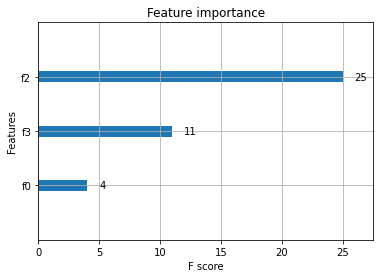

In [ ]:
#Feature importance
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(bst)
pyplot.show()

#f1 - sepal length in cm
#f2 - sepal width in cm
#f3 - petal length in cm
#f4 - petal width in cm 

##Bagging

In [ ]:
model_bagging = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5, max_features=1, n_estimators=20)
model_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=1,
                  max_samples=0.5, n_estimators=20)

In [ ]:
model_bagging.score(X_test, y_test)

0.9333333333333333

##Single Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_test, y_test)

0.9666666666666667


###From the accuracy obtained from the about models, it is difficult to state definitively a particular model/s that is significantly better at predicition of the "Iris" dataset.